# Predicting Heart Disease

In [ ]:
# https://www.kaggle.com/ronitf/predicting-heart-disease

In [1]:
# impots 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')
#print first 10 rows
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


we can see that we have a small 303 rows data set. our data has no nulls and no other chars to represent it. all our data is numeric - therefore, no enumeration needed.

In [4]:
healthy = df[(df['target'] ==0) ].count()[1]
sick = df[(df['target'] ==1) ].count()[1]
print ("num of pepole without heart deacise: "+ str(healthy))
print ("num of pepole with chance for heart deacise: "+ str(sick))

num of pepole without heart deacise: 138
num of pepole with chance for heart deacise: 165


In [5]:
# we will nurmaize the data and split it to test and train.
# we choose to splite 30-70 because we have a small data set and we want to have enught validetionn examples.
# split data table into data X and class labels y

X = df.iloc[:,0:13].values
y = df.iloc[:,13].values
#nurmalize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index=df.index, columns=df.columns[0:13])
# # add non-feature target column to dataframe
dfNorm['target'] = df['target']
dfNorm.head(10)

X = dfNorm.iloc[:,0:13].values
y = dfNorm.iloc[:,13].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((212, 13), (212,), (91, 13), (91,))

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


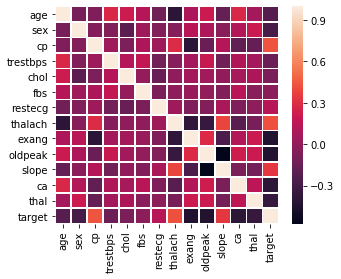

In [7]:
# # calculate the correlation matrix
corr = dfNorm.corr()

# plot the heatmap
fig = plt.figure(figsize=(5,4))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75)

## helping functions:

In [9]:
# conda install mlxtend は見つからなかった
# 仕方なく pip intall mlxtend でライブラリーをインストール
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
def sfs_features(algo_namem,features_nums):
    sfs_name=SFS(algo_namem, 
                k_features=features_nums, 
                forward=True, 
                floating=False,
                scoring='accuracy',
                cv=5)
    return sfs_name

In [10]:
results_test = {}
results_train = {}
list_algos=[]

In [11]:
def prdict_date(algo_name,X_train,y_train,X_test,y_test,atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("acc train: " + str(acc_train))
        print("acc test: "+ str(acc_val))
    else:
        return Y_pred

In [12]:
def print_fitures(sfs_name='sfs1',verbose=0):
    a= (sfs_name.k_feature_idx_[0],sfs_name.k_feature_idx_[1],sfs_name.k_feature_idx_[2])
    if verbose ==0:
        print('Selected features:', sfs_name.k_feature_idx_)
        for i in range (len (sfs_name.k_feature_idx_)):
            print (df.iloc[:,sfs_name.k_feature_idx_[i]].name)
    return a

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

def roc_graph_cv(algo_name,X,y,cvn=5):
    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=cvn)
    classifier =algo_name

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X[train], y[train].ravel()).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test].ravel(), probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [14]:
### helping function

def conf(algo_name,X_test, y_test):
    y_pred = algo_name.predict(X_test)
    forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
    sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(str(algo_name)[0:str(algo_name).find('(')])

## PCA

Principal component analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset.
we use it first make data easy to explore and visualize.

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


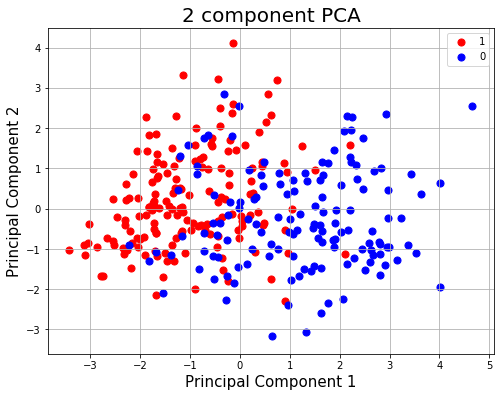

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r',  'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


## Define The Algorithems

first we will run eatch algorithem on all the features
then we will use SFS to compere and cheack improvment. we will use sfs to take aoutimaticly from 1 to 5 features as the algorithem sujests

In [16]:
### LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
prdict_date(lda,X_train,y_train,X_test,y_test)

acc train: 85.38
acc test: 80.22


In [17]:
#predictusing sfs:
sfs_1=sfs_features(lda,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_fitures(sfs_1)

#plot3D(sfs_1.k_feature_idx_[0],sfs_1.k_feature_idx_[1],sfs_1.k_feature_idx_[2],'knn')

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)
print ('\n')
prdict_date(lda,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (2, 7, 9, 11, 12)
cp
thalach
oldpeak
ca
thal


acc train: 83.96
acc test: 82.42


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


              precision    recall  f1-score   support

           0       0.89      0.73      0.80        44
           1       0.78      0.91      0.84        47

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



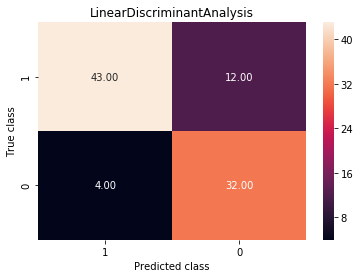

In [18]:
print(classification_report(y_test, lda.predict(X_test_sfs)))
conf(lda,X_test_sfs, y_test)

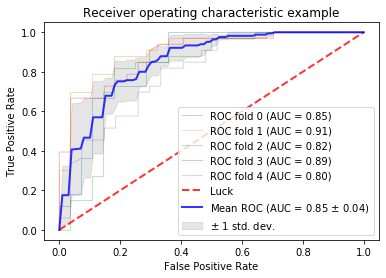

In [19]:
roc_graph_cv(lda,X[:,selectedFeatures],y)

In [20]:
### RANDOM FOREST
# Train: Random Forest
random_forest = RandomForestClassifier(n_estimators=50, random_state = 0)
prdict_date(random_forest,X_train,y_train,X_test,y_test)

acc train: 100.0
acc test: 84.62


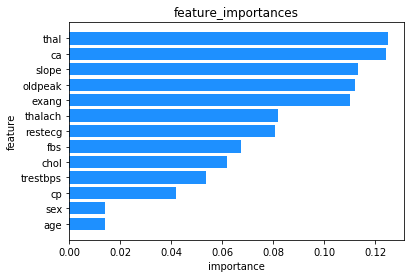

In [21]:
feature_importance = random_forest.feature_importances_
feat_importances = pd.Series(random_forest.feature_importances_, index=df.columns[:-1])
feat_importances = feat_importances.nlargest(13)

feature = df.columns.values.tolist()[0:-1]
importance = sorted(random_forest.feature_importances_.tolist())


x_pos = [i for i, _ in enumerate(feature)]

plt.barh(x_pos, importance , color='dodgerblue')
plt.ylabel("feature")
plt.xlabel("importance")
plt.title("feature_importances")

plt.yticks(x_pos, feature)

plt.show()

In [22]:
#taking the best 5 features give as smaller result.
currlist =[2,12,10,9,11]
# print (currlist)

random_forest = RandomForestClassifier(n_estimators=100, random_state = 0)
prdict_date(random_forest,X_train[:,currlist],y_train,X_test[:,currlist],y_test,'FS')

acc train: 95.28
acc test: 83.52


In [23]:
sfs_1=sfs_features(random_forest,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_fitures(sfs_1)


X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

print ("\n")
prdict_date(random_forest,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (2, 11, 12)
cp
ca
thal


acc train: 86.32
acc test: 82.42


              precision    recall  f1-score   support

           0       0.87      0.75      0.80        44
           1       0.79      0.89      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



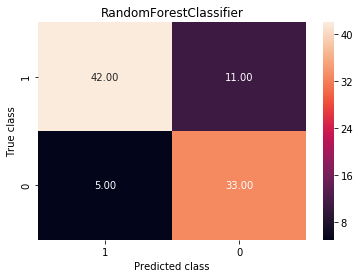

In [24]:
print(classification_report(y_test, random_forest.predict(X_test_sfs)))
conf(random_forest,X_test_sfs, y_test)

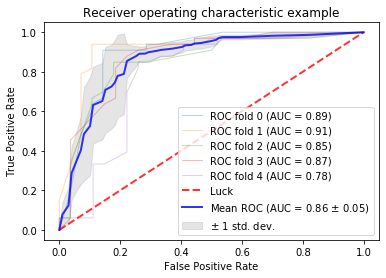

In [25]:
roc_graph_cv(random_forest,X[:,selectedFeatures],y)

In [26]:
### DECISION TREE
#  descion tree
dect = tree.DecisionTreeClassifier()

prdict_date(dect,X_train,y_train,X_test,y_test)

acc train: 100.0
acc test: 72.53


In [27]:
sfs_1=sfs_features(dect,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_fitures(sfs_1)

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

prdict_date(dect,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (8, 11, 12)
exang
ca
thal
acc train: 86.79
acc test: 78.02


              precision    recall  f1-score   support

           0       0.85      0.66      0.74        44
           1       0.74      0.89      0.81        47

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



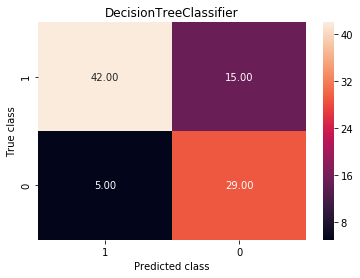

In [28]:
print(classification_report(y_test, dect.predict(X_test_sfs)))
conf(dect,X_test_sfs, y_test)

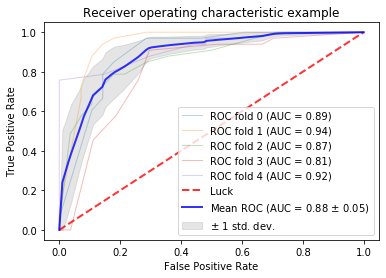

In [29]:
roc_graph_cv(dect,X[:,selectedFeatures],y)

In [30]:
# Gradient Boosting
# Train: Gradient Boosting
gbc = GradientBoostingClassifier(loss='exponential', learning_rate=0.03, n_estimators=75 , max_depth=6)
prdict_date(gbc,X_train,y_train,X_test,y_test)

acc train: 100.0
acc test: 81.32


In [31]:
sfs_1=sfs_features(gbc,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_fitures(sfs_1)


X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

print ("\n")
prdict_date(gbc,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (8, 11, 12)
exang
ca
thal


acc train: 86.79
acc test: 78.02


              precision    recall  f1-score   support

           0       0.85      0.66      0.74        44
           1       0.74      0.89      0.81        47

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



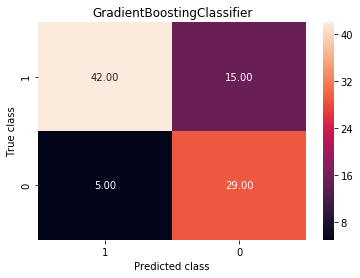

In [32]:
print(classification_report(y_test, gbc.predict(X_test_sfs)))
conf(gbc,X_test_sfs, y_test)

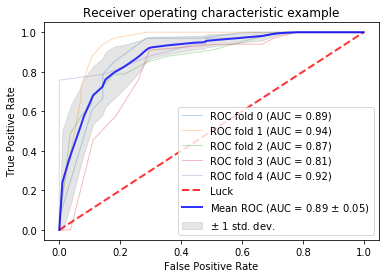

In [33]:
roc_graph_cv(gbc,X[:,selectedFeatures],y)

The optimal number of neighbors is 10 with 82.6%


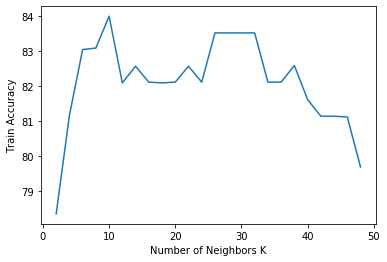

In [34]:
#### KNN 
##to choose the right K we build a loop witch examen all the posible values for K. 
from sklearn import model_selection

#Neighbors
neighbors = [x for x in list(range(1,50)) if x % 2 == 0]

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
seed=123
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    #print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(( "The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k])))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

The optimal number of neighbors is 6 with 76.9%


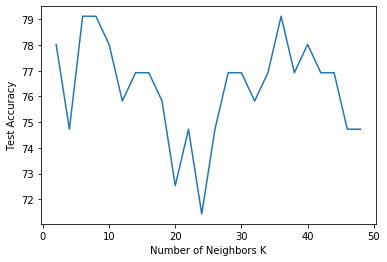

In [35]:
cv_preds = []

#Perform 10-fold cross validation on testing set for odd values of k
seed=123
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    preds = model_selection.cross_val_predict(knn, X_test, y_test, cv=kfold)
    cv_preds.append(metrics.accuracy_score(y_test, preds)*100)
    #print("k=%d %0.2f" % (k_value, 100*metrics.accuracy_score(test_y, preds)))

optimal_k = neighbors[cv_preds.index(max(cv_preds))]
print("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_preds[optimal_k]))

plt.plot(neighbors, cv_preds)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [36]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 6)
prdict_date(knn,X_train,y_train,X_test,y_test)

acc train: 83.96
acc test: 85.71


Selected features: (2, 6, 10, 11, 12)
cp
restecg
slope
ca
thal
acc train: 88.68
acc test: 76.92
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        44
           1       0.74      0.85      0.79        47

    accuracy                           0.77        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



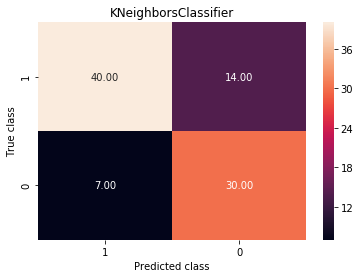

In [37]:
sfs_1=sfs_features(knn,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_fitures(sfs_1)

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

prdict_date(knn,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')
print(classification_report(y_test, knn.predict(X_test_sfs)))
conf(knn,X_test_sfs, y_test)

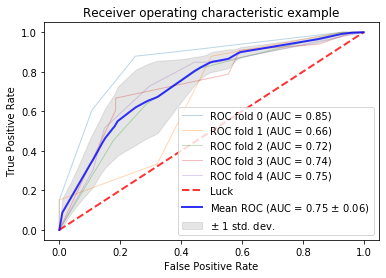

In [38]:
roc_graph_cv(knn,X[:,selectedFeatures],y)

In [39]:
### SVM 
#  SVM
svm = SVC(kernel='linear', probability=True)
prdict_date(svm,X_train,y_train,X_test,y_test,'linear')  

acc train: 86.79
acc test: 80.22


In [40]:
#  SVM
svm = SVC(kernel='poly', probability=True)
prdict_date(svm,X_train,y_train,X_test,y_test,'poly')

acc train: 91.98
acc test: 78.02


C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [41]:
#  SVM
svm = SVC(kernel='rbf', probability=True)
prdict_date(svm,X_train,y_train,X_test,y_test,'rbf')

acc train: 91.51
acc test: 81.32


C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

Selected features: (2, 5, 10, 11, 12)
cp
fbs
slope
ca
thal
acc train: 85.85
acc test: 83.52
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

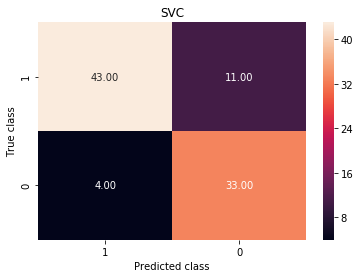

In [42]:
sfs_1=sfs_features(svm,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_fitures(sfs_1)

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

prdict_date(svm,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')
print(classification_report(y_test, svm.predict(X_test_sfs)))
conf(svm,X_test_sfs, y_test)

C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\301518\AppData\Local\Continuum\anaconda3\envs\Seminar\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

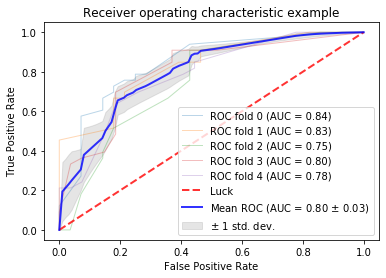

In [43]:
roc_graph_cv(svm,X[:,selectedFeatures],y)

## Table Reasults

In [44]:
# print (results_test)

df_test =pd.DataFrame(list(results_test.items()),
                      columns=['algo_name','acc_test'])
df_train =pd.DataFrame(list(results_train.items()),
                      columns=['algo_name','acc_train'])
df_results = df_test.join(df_train.set_index('algo_name'), on='algo_name')
df_results.sort_values('acc_test',ascending=False)

,algo_name,acc_test,acc_train
9,KNeighborsClassifier_,85.71,83.96
2,RandomForestClassifier_,84.62,100.00
3,RandomForestClassifier_FS,83.52,95.28
14,SVC_sfs,83.52,85.85
1,LinearDiscriminantAnalysis_sfs,82.42,83.96
4,RandomForestClassifier_sfs,82.42,86.32
7,GradientBoostingClassifier_,81.32,100.00
13,SVC_rbf,81.32,91.51
0,LinearDiscriminantAnalysis_,80.22,85.38
11,SVC_linear,80.22,86.79


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


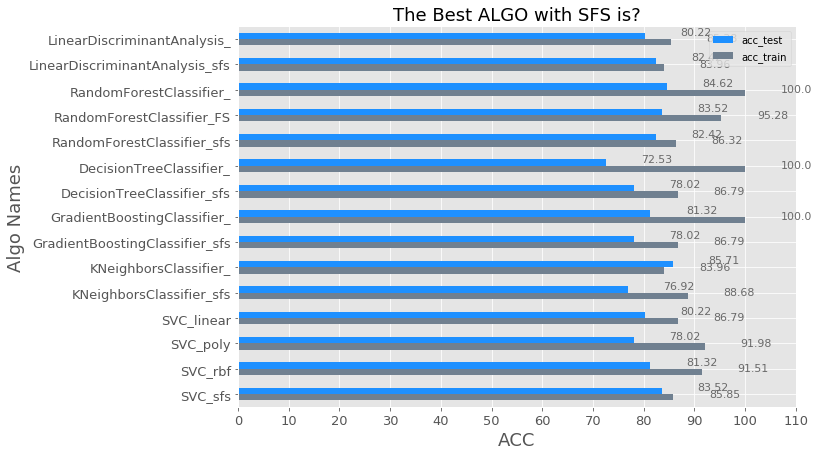

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# set jupyter's max row display
pd.set_option('display.max_row', 100)

# set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

# Load the dataset
ax = df_results[['acc_test', 'acc_train']].plot(kind='barh',
              figsize=(10,7), color=['dodgerblue', 'slategray'], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("The Best ALGO with SFS is?",
fontsize=18)
ax.set_xlabel("ACC", fontsize=18)
ax.set_ylabel("Algo Names", fontsize=18)
ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100,110])
ax.set_yticklabels(df_results.iloc[:,0].values.tolist())

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+7, i.get_y()+.1, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

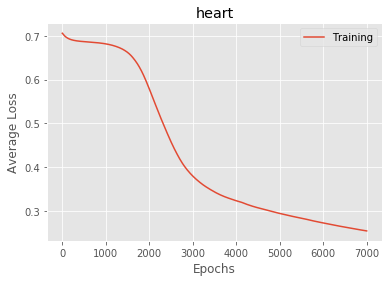

Accuracy of the network 85 %
Accuracy of the train 90 %


In [49]:
### NUERAL NETWORK

# conda install pytorch-cpu torchvision-cpu -c pytorch でインストール

xtrain = X_train
ytrain = y_train

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
torch.manual_seed(42)

#hyperparameters
# h1 = 6
# h2 = 4
# lr = 0.0023
# num_epoch =7000

h1 = 6
h2 = 4
lr = 0.0023
num_epoch =7000

#build model
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, 2)
    

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        #return  F.log_softmax(x, dim=1)
        return x
net = Net()

#choose optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.7)

loss_per_epoch = []

#train
for epoch in range(num_epoch):
    X = Variable(torch.Tensor(xtrain).float())
    Y = Variable(torch.Tensor(ytrain).long())

    #feedforward - backprop
    optimizer.zero_grad()
    out = net(X)
    loss = criterion(out, Y)
    loss.backward()
    optimizer.step()

#     if (epoch) % 50 == 0:
#         print ('Epoch [%d/%d] Loss: %.4f' 
#                    %(epoch+1, num_epoch, loss.data[0]))
    loss_per_epoch.append( loss.item()) 
        
epochs = np.arange(1,num_epoch + 1)
plt.plot(epochs, loss_per_epoch, label='Training')
plt.ylabel('Average Loss')
plt.xlabel('Epochs')
plt.title('heart')
plt.legend()
plt.show()       

xtest = X_test
ytest = y_test

#get prediction
X = Variable(torch.Tensor(xtest).float())
Y = torch.Tensor(ytest).long()
out = net(X)
_, predicted = torch.max(out.data, 1)


#get prediction train
Xt = Variable(torch.Tensor(xtrain).float())
Yt = torch.Tensor(ytrain).long()
out = net(Xt)
_, predicted_train = torch.max(out.data, 1)

#get accuration
print('Accuracy of the network %d %%' % (100 * torch.sum(Y==predicted) / len(y_test)))
print('Accuracy of the train %d %%' % (100 * torch.sum(Yt==predicted_train) / len(y_train)))